The workflow is majorly divided in the following steps:

1. Load and inspect the data
2. EDA and financial behavior analysis
3. Feature Engineering
4. Handling class imbalance
5. Training and evaluating the model
6. tuning classification threshold
7. explaining model
8. predicting on the given validation dataset

# Importing Liberaries

In [ ]:
# %pip install shap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
import imblearn
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score, fbeta_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve
import shap
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Loading Data

In [ ]:
df = pd.read_csv('/content/train_dataset_final1.csv')
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [ ]:
df.loc[4]

,4
Customer_ID,5021.00
marriage,2.00
sex,0.00
education,1.00
LIMIT_BAL,280000.00
age,32.00
pay_0,-2.00
pay_2,-2.00
pay_3,-2.00
pay_4,-2.00


checking one of the row for detailed info

In [ ]:
df.shape

(25247, 27)

Number of rows = 25,247

Number of Columns = 27

In [ ]:
with pd.option_context('display.max_columns', None):
    print(df.describe())

        Customer_ID      marriage           sex     education       LIMIT_BAL  \
count  25247.000000  25247.000000  25247.000000  25247.000000    25247.000000   
mean   17640.000000      1.551907      0.604111      1.852101   168342.060443   
std     7288.325459      0.522629      0.489050      0.797379   129892.784807   
min     5017.000000      0.000000      0.000000      0.000000    10000.000000   
25%    11328.500000      1.000000      0.000000      1.000000    50000.000000   
50%    17640.000000      2.000000      1.000000      2.000000   140000.000000   
75%    23951.500000      2.000000      1.000000      2.000000   240000.000000   
max    30263.000000      3.000000      1.000000      6.000000  1000000.000000   

                age         pay_0         pay_2         pay_3         pay_4  \
count  25121.000000  25247.000000  25247.000000  25247.000000  25247.000000   
mean      35.438199     -0.042857     -0.159544     -0.190359     -0.241415   
std        9.174998      1.099315

Printing the complete summary of the datset

In [ ]:
df.isna().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


checking for NaN values present in the dataset. Only the age column contains null values

# EDA and Financial analysis

<ipython-input-8-954548737>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age,kde=True)


<Axes: xlabel='age', ylabel='Density'>

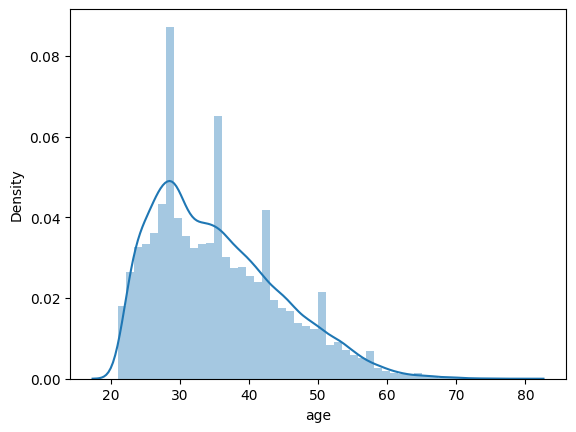

In [ ]:
sns.distplot(df.age,kde=True)

*distriution of age does not follow a normal curve, it is skewed right, so it is not great to replace null values by mean age*

<Axes: ylabel='age'>

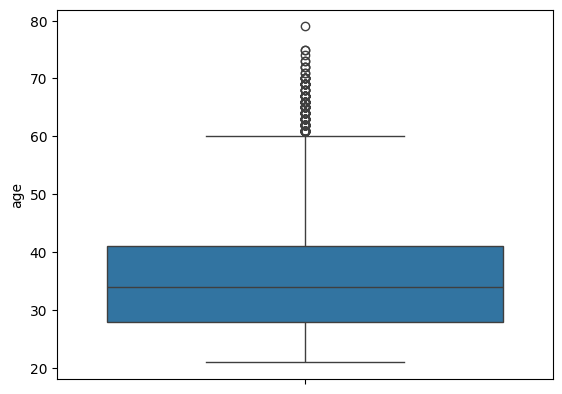

In [ ]:
sns.boxplot(df.age)

*the age has certain outliers. The whiskers of the box plot correspond to 60 in age, so values above than 60 are outliers. Now, checking the percentage of outliers.*

In [ ]:
print(f'{(df[df.age>60].shape[0]/df.shape[0])*100:.4f}% ')

0.8595% 


the outliers in age are less than 1%

*to fill nan values in age we can take log of the age column to reduce skewness and replace the missing values by mean if the data goes toward a normal curve*

<ipython-input-11-763332328>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.age),kde=True)


<Axes: xlabel='age', ylabel='Density'>

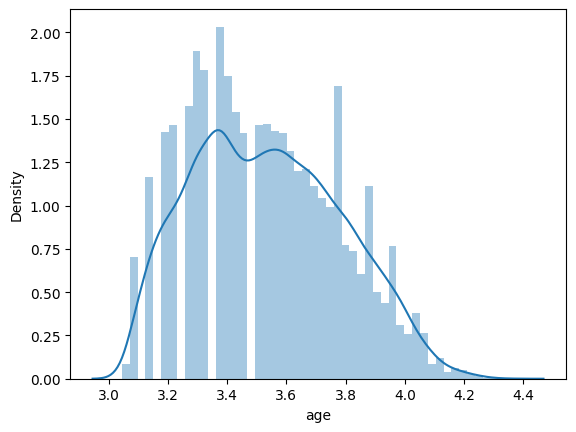

In [ ]:
sns.distplot(np.log(df.age),kde=True)

*finding of the mean of the log(age) curve and then exponentiating it to get the age value.*

*Similarly, doing the same with the median.*

In [ ]:
np.exp(np.log(df.age).mean())

np.float64(34.32501865639386)

In [ ]:
np.exp(np.log(df.age).median())

np.float64(34.00000000000001)

In [ ]:
df.age.dtype

dtype('float64')

mean and median are close enough which shows that log transformation makes the age column's distribution to follow a normal curve and choosing median to replace NaN values in order to make a integral valued column  

In [ ]:
df.age = df.age.fillna(34,axis = 0)

In [ ]:
df.isna().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


we have removed the NaN values

<Axes: xlabel='next_month_default', ylabel='Count'>

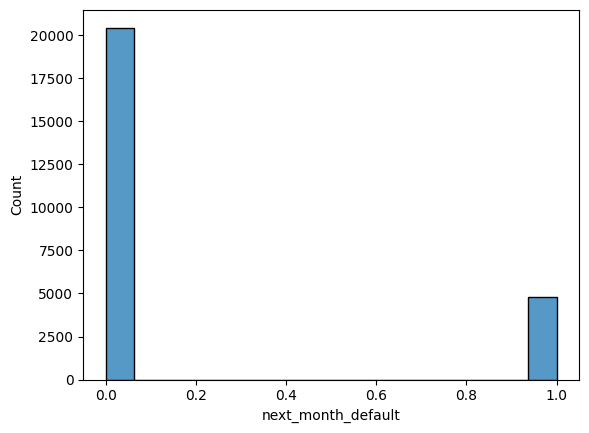

In [ ]:
sns.histplot(df.next_month_default,kde=False)

dataset is highly unbalanced

In [ ]:
df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

separating categorical and non categorical columns

In [ ]:
categorical_data_cols = ['marriage','sex','education','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
non_categorical_data_cols = ['LIMIT_BAL', 'age','Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio']

plotting the distribution of all non categorical data

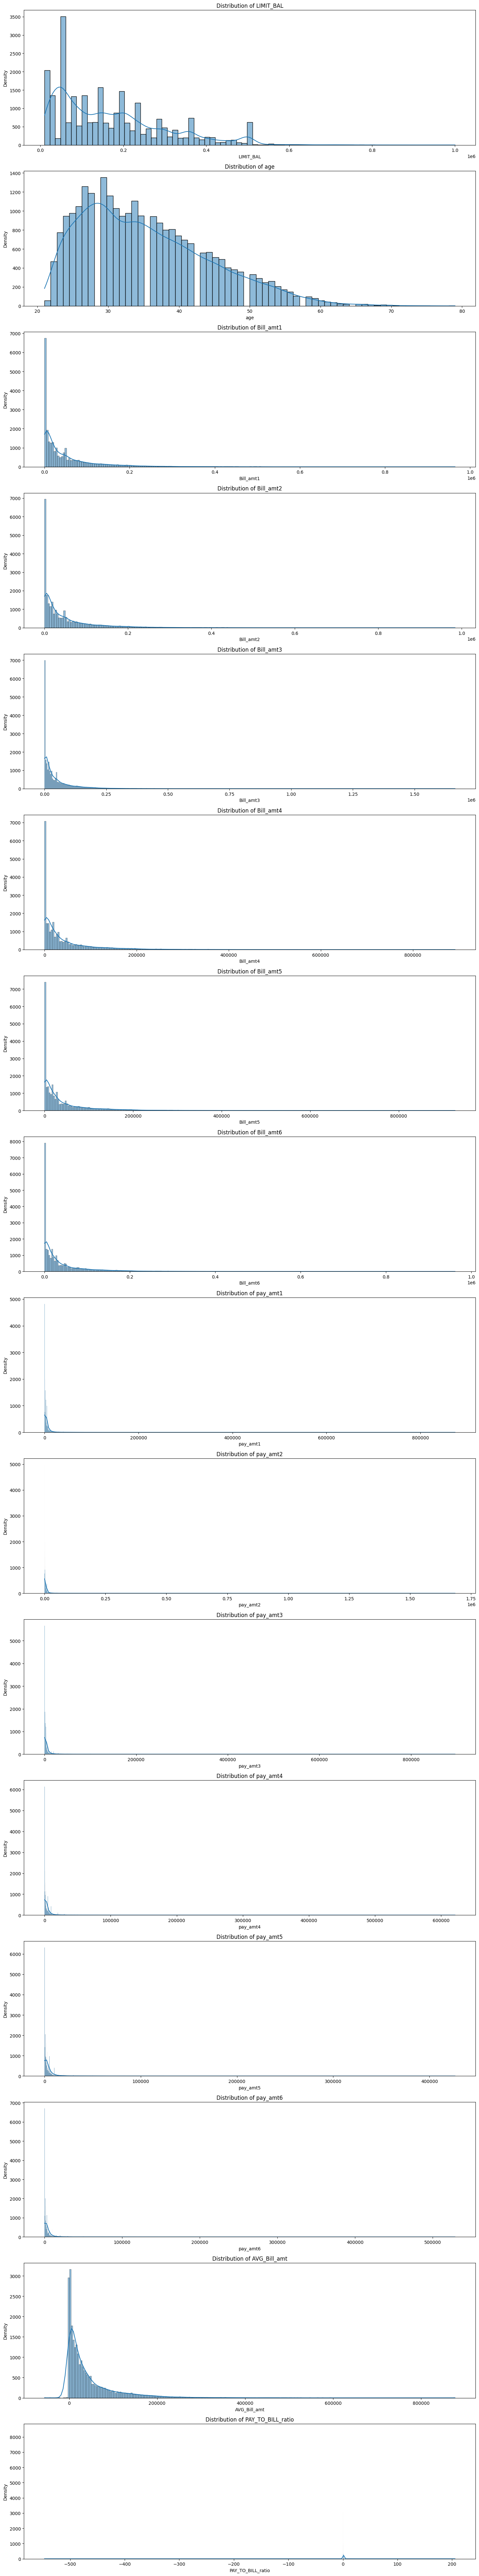

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)



plt.figure(figsize=(15, 5 * len(non_categorical_data_cols)))

for i, col in enumerate(non_categorical_data_cols):
    plt.subplot(len(non_categorical_data_cols), 1, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()

*None of them follows a normal distribution*

---



### 💳 Creating a New Feature: Credit Utilization Ratio

To better understand a customer's credit behavior, we calculate a new feature called **`utilization_ratio`**.

---

### 📐 Formula:

Let:

- `AVG_BILL_AMTᵢ` = Average bill amount over the past months for customer *i*  
- `LIMIT_BALᵢ` = Credit limit for customer *i*

Then,

```text
utilization_ratioᵢ = AVG_BILL_AMTᵢ / LIMIT_BALᵢ


Text(0.5, 1.0, 'Utilization Ratio vs Default')

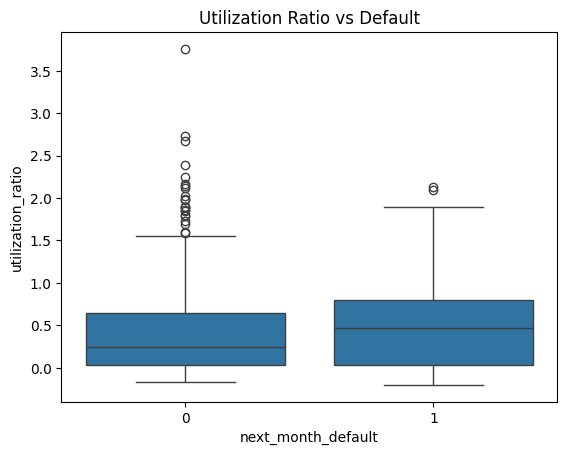

In [ ]:
df['utilization_ratio'] = df['AVG_Bill_amt'] / df['LIMIT_BAL']

sns.boxplot(data=df, x='next_month_default', y='utilization_ratio')
plt.title('Utilization Ratio vs Default')

*mean utilization ratio of the default is slightly more.*

---



### 🧮 Feature Engineering: Payment Delay Metrics

The following derived features are calculated to capture customer payment behavior:

---

- 📌 **`delayed_months`**  
  → Total number of months in which the **bill payment was delayed** (i.e., `pay_m > 0`)

- 📈 **`max_delay`**  
  → The **maximum number of months** a customer delayed bill payment across all months

- 🚨 **`consec_delinquency`**  
  → The number of months where the **payment delay exceeded 3 months** (i.e., `pay_m > 3`)

---

> ✅ These features help quantify **credit risk** and **payment discipline** over time.


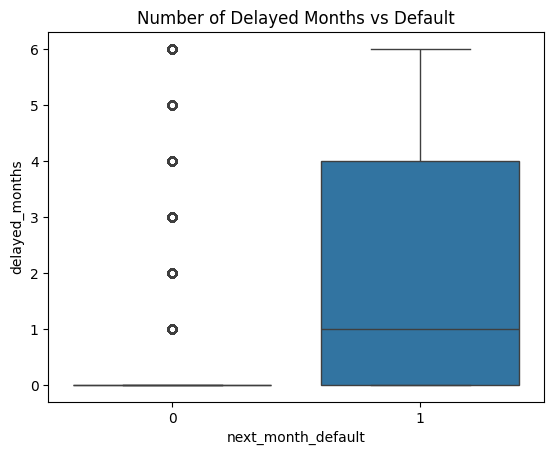

In [ ]:
pay_cols = [f'pay_{i}' for i in range(7)]
pay_cols.remove('pay_1')
df['delayed_months'] = df[pay_cols].apply(lambda x: sum(x > 0), axis=1)
df['max_delay'] = df[pay_cols].max(axis=1)
df['consec_delinquency'] = df[pay_cols].apply(lambda x: int((x > 0).sum() >= 3), axis=1)
sns.boxplot(x='next_month_default', y='delayed_months', data=df)
plt.title('Number of Delayed Months vs Default')
plt.show()


*mean delayed months of defaults is 1 on the other hand mean delayed month of non default is 0 however some have greater values of delayed months.*

---



<Axes: xlabel='next_month_default', ylabel='LIMIT_BAL'>

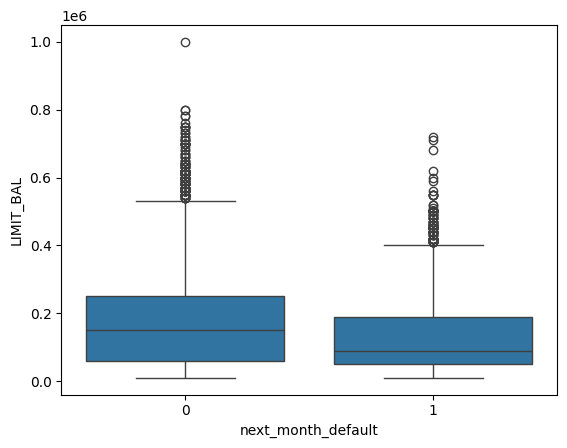

In [ ]:
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=df)

*limit_bal mean is greater for non default than default*

<Axes: xlabel='next_month_default', ylabel='PAY_TO_BILL_ratio'>

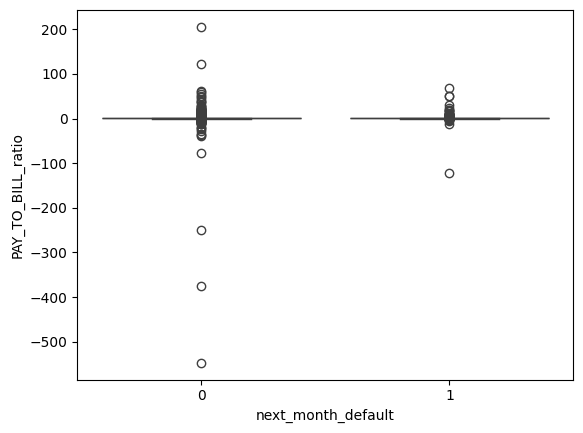

In [ ]:
sns.boxplot(x='next_month_default', y='PAY_TO_BILL_ratio', data=df)

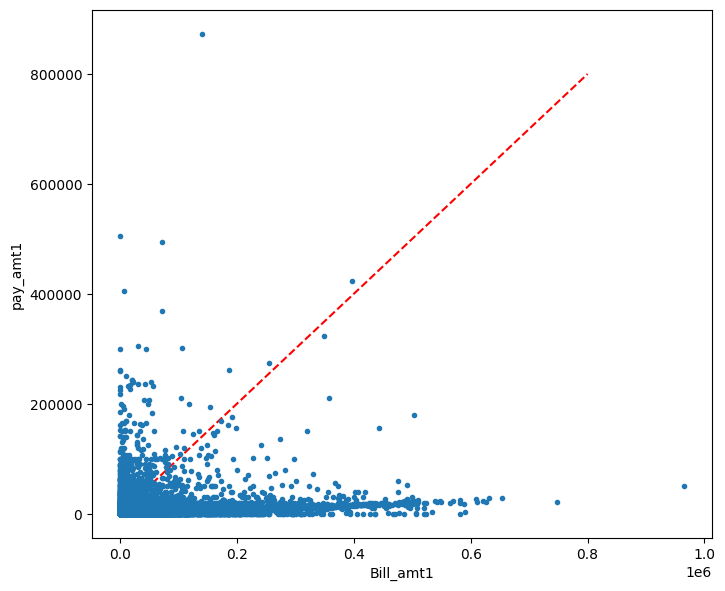

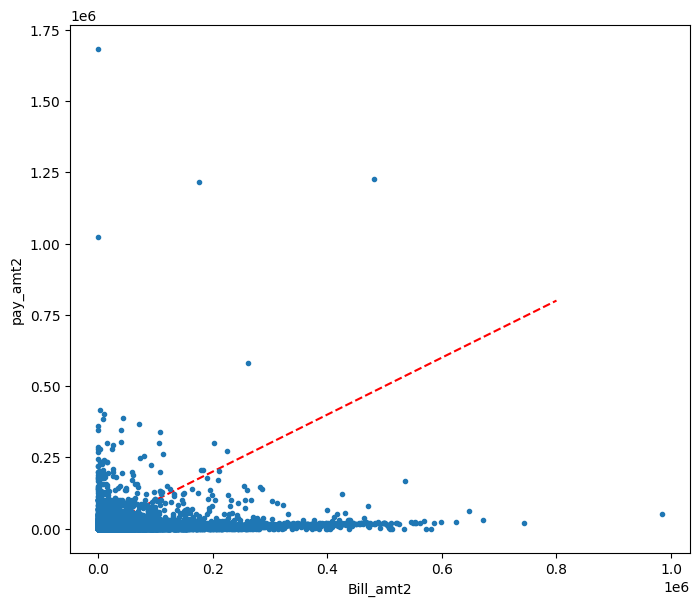

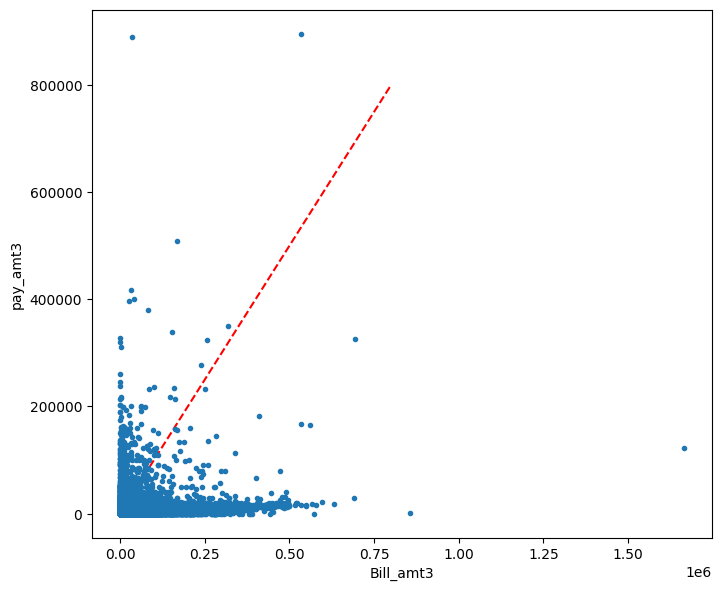

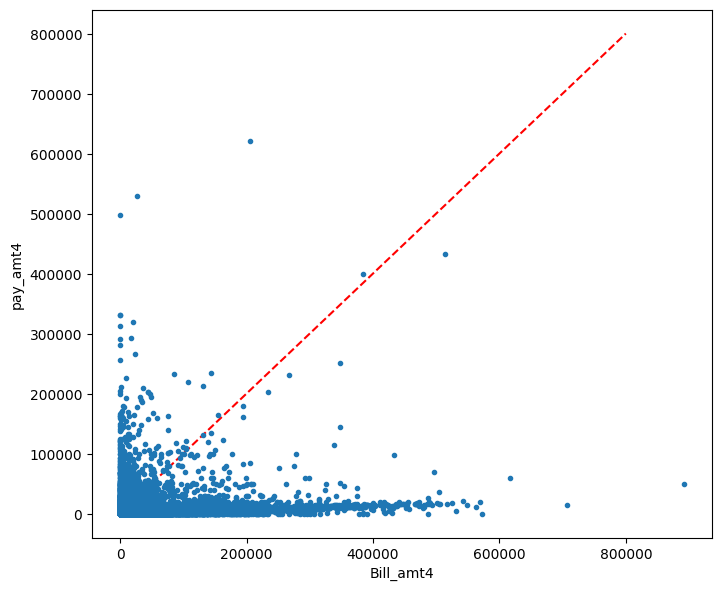

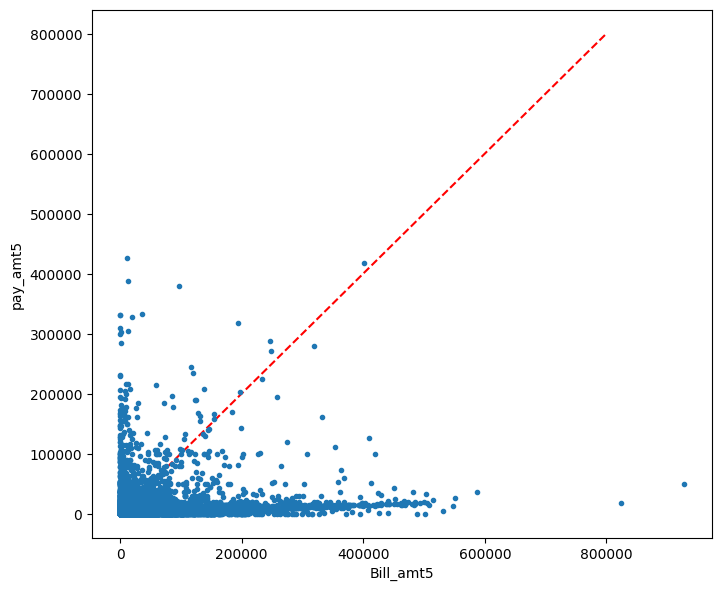

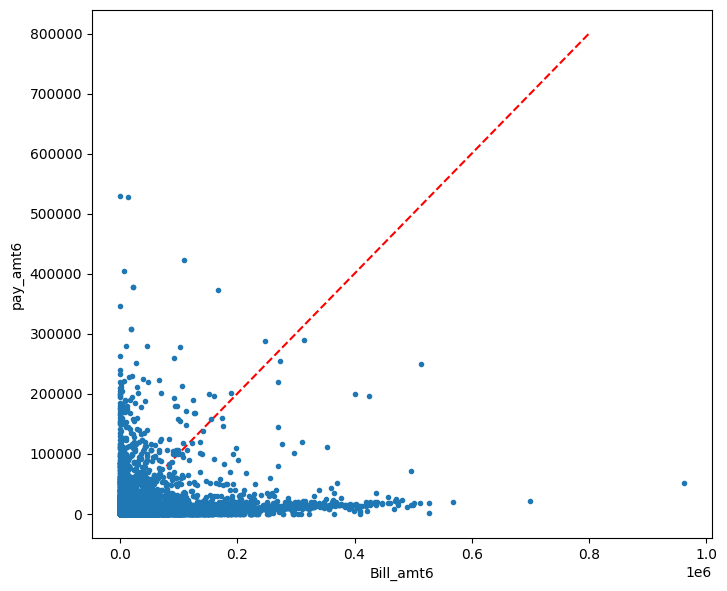

In [ ]:
for m in range(6):
    plt.figure(figsize=(8, 8*6))

    plt.subplot(6,1,m+1)
    plt.plot([0, 800000], [0, 800000], color='red', linestyle='--', label='y = x')
    plt.plot( df[f'Bill_amt{m+1}'], df[f'pay_amt{m+1}'],'.')
    plt.xlabel(f'Bill_amt{m+1}')
    plt.ylabel(f'pay_amt{m+1}')

in most of the calse the bill amount is not equal to paid amount, either bill amount is more or paid amount is more





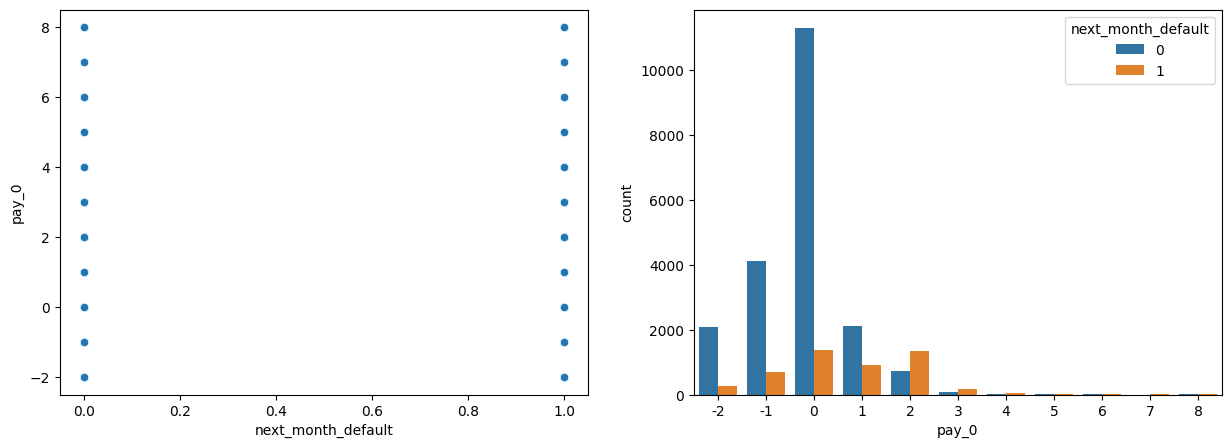

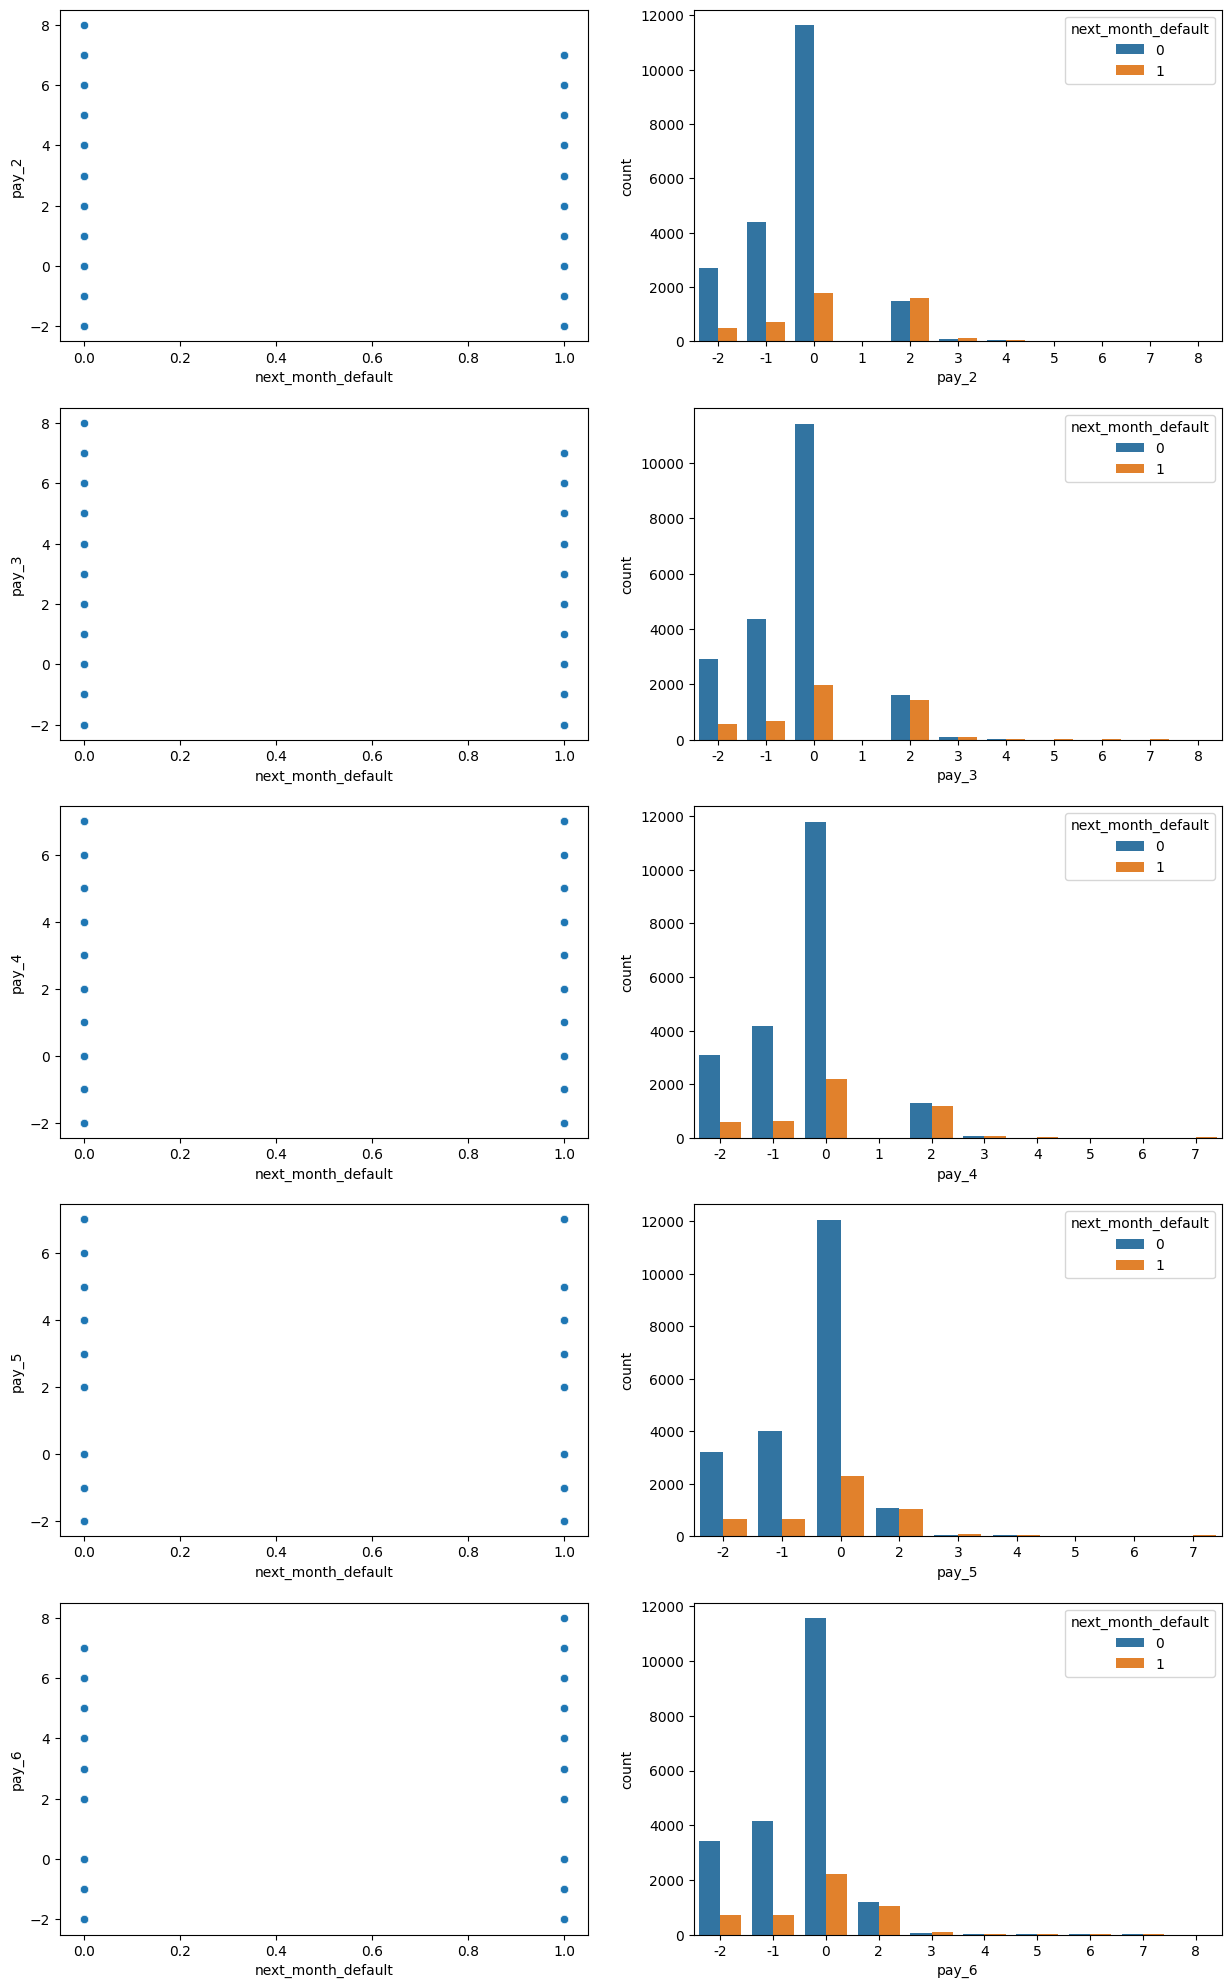

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.scatterplot(df, x ='next_month_default' , y = 'pay_0')
plt.subplot(1,2,2)
sns.countplot(df, x = 'pay_0',hue = 'next_month_default')

plt.figure(figsize=(15, 25))
for m in range(5):
    # 2D plot
    plt.subplot(5, 2, 2*m+1)
    sns.scatterplot(df, x='next_month_default', y=f'pay_{m+2}')
    # plt.title(f'2D: next_month_default vs pay_{m+2}')

    # 1D plot
    plt.subplot(5, 2, 2*m+2)
    sns.countplot(df, x = df[f'pay_{m+2}'],hue = 'next_month_default')
    # plt.title(f'Distribution of pay_{m+2}')

### 📊 Distribution of Unique `pay_m` Values and Their Counts

This visualization presents:

- 🔹 The **unique `pay_m` values** for both classes of `next_month_default`  
- 🔹 A **count plot** (on the right) showing the frequency of each `pay_m` value

---

### 📉 Observation

- Values **greater than 2** have **negligible counts**, indicating that such delays are rare in the dataset.
- To simplify the distribution and reduce sparsity, we will **merge all `pay_m` values ≥ 2** into a single category.

---

### 🔄 Mapping Strategy

- All values **≥ 2** will be grouped and represented as:
  
  ```text
  pay_m = 2 → Indicates payment is delayed by 2 or more months


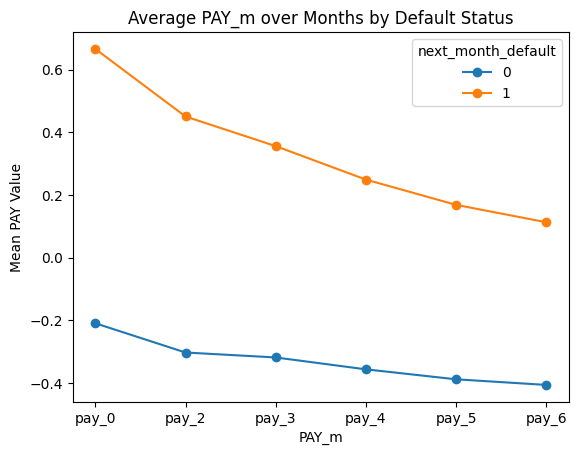

In [ ]:
pay_means = df.groupby('next_month_default')[pay_cols].mean().T
pay_means.plot(marker='o')
plt.title('Average PAY_m over Months by Default Status')
plt.ylabel('Mean PAY Value')
plt.xlabel('PAY_m')
plt.show()

### 📊 Average `pay_m` Value for Default vs Non-Default Customers

This plot shows the **average `pay_m` values** for customers who defaulted and those who did not.

- 🔴 **Defaults**:  
  The mean `pay_m` values are **positive**, indicating that these customers **consistently failed to pay their bills in full**, leaving some amount due each month.

- 🟢 **Non-Defaults**:  
  The average `pay_m` values are **less than zero**, suggesting that most non-defaulting customers **paid their bills on time** or even **in advance**.

> ✅ A lower or negative `pay_m` value generally reflects **good repayment behavior**, while a higher value indicates **delinquency**.


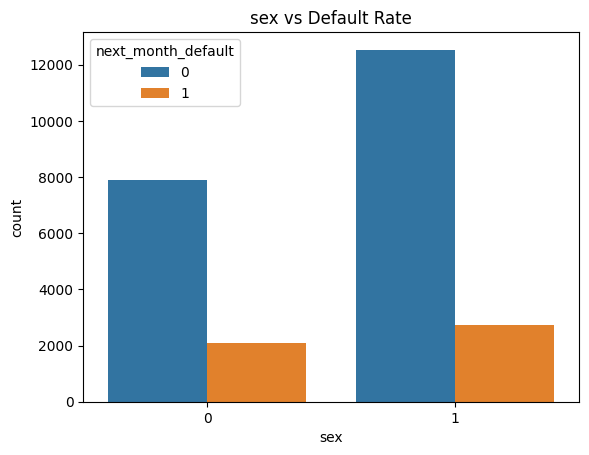

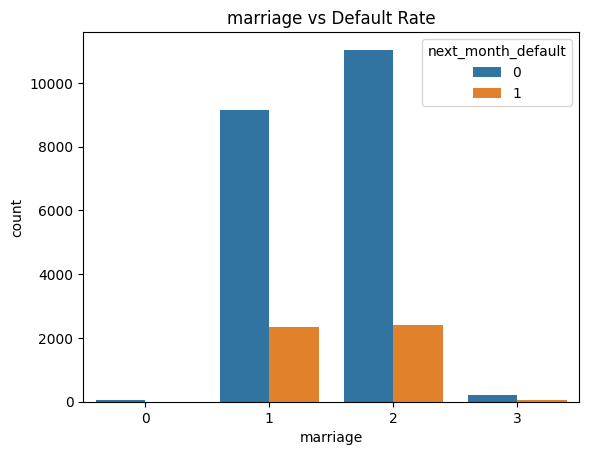

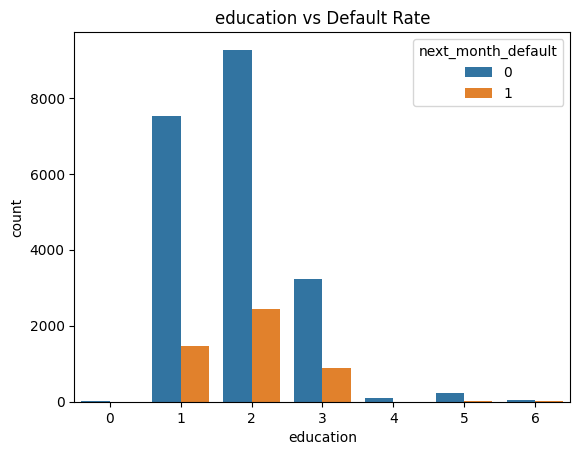

In [ ]:
cols = ['sex', 'marriage', 'education']

for col in cols:
    sns.countplot(data=df, x=col, hue='next_month_default')
    plt.title(f'{col} vs Default Rate')
    plt.show()

**these lower counts could be due to dataset imbalance**

---



###Financial Insights

Customers who underpay repeatedly despite small bills are riskier.

Customers with high utilization and long payment delay streaks are high risk.

Older customers might have different payment behavior than younger ones.

Underpayment or payment stagnation despite increasing bills is a red flag.

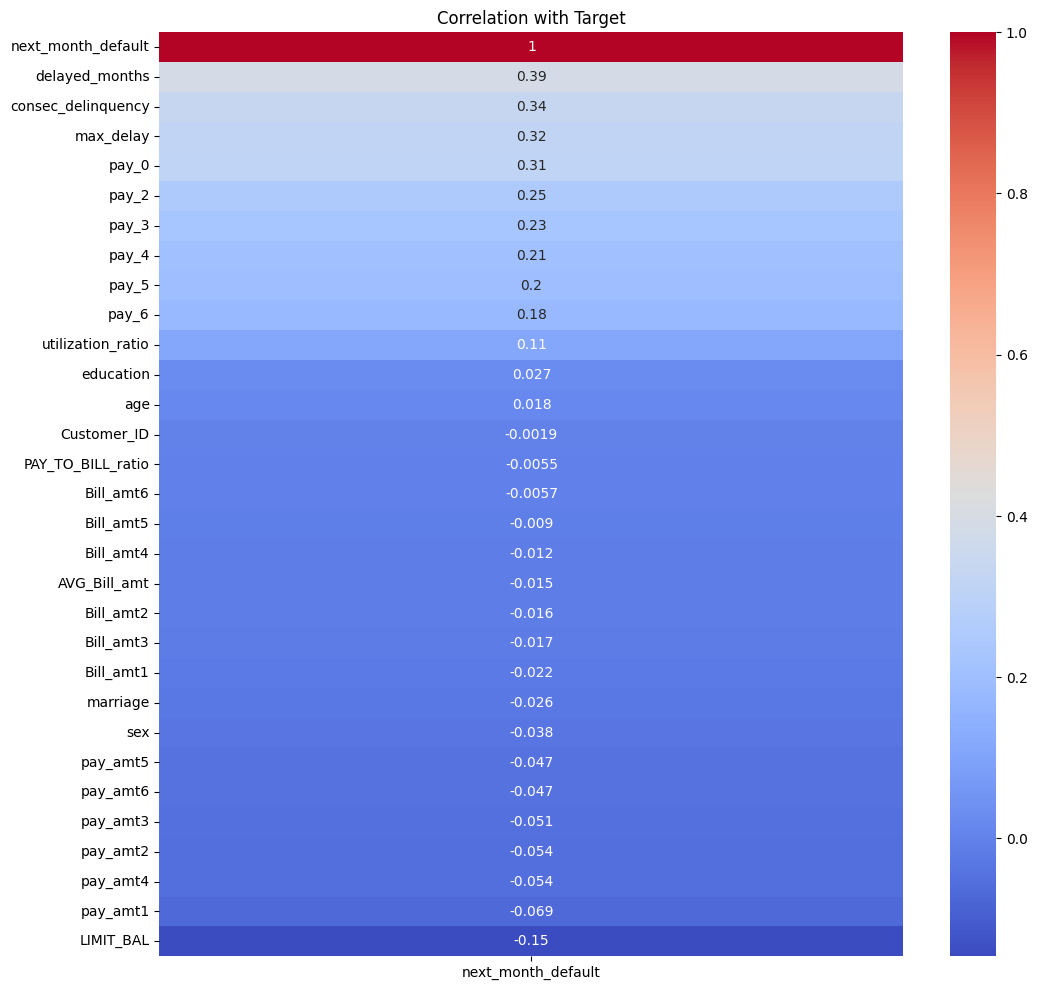

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix[['next_month_default']].sort_values(by='next_month_default', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Target')
plt.show()

*this shows the correlation values of the features with the target variable*

---



*checking for unique values and their counts*

<Axes: xlabel='delayed_months', ylabel='Count'>

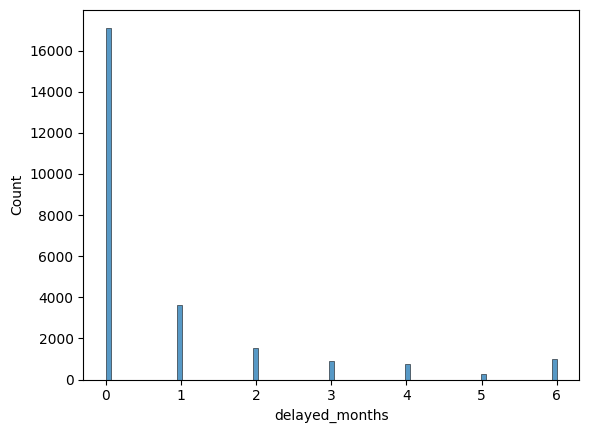

In [ ]:
sns.histplot(df.delayed_months)

In [ ]:
df.delayed_months.unique()

array([3, 0, 1, 5, 2, 6, 4])

In [ ]:
df.consec_delinquency.unique()

array([1, 0])

In [ ]:
df.max_delay.unique()

array([ 2,  0, -2,  1, -1,  8,  3,  4,  7,  5,  6])

<Axes: xlabel='max_delay', ylabel='Count'>

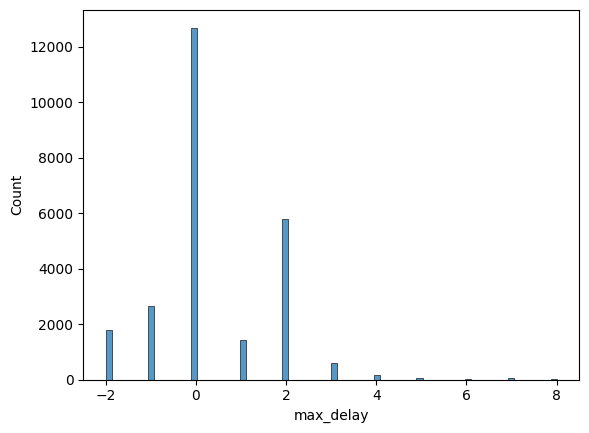

In [ ]:
sns.histplot(df.max_delay)

In [ ]:
df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'utilization_ratio', 'delayed_months', 'max_delay',
       'consec_delinquency'],
      dtype='object')

In [ ]:
print(f'unique values in marriage{df.marriage.unique()}')

unique values in marriage[2 1 3 0]


In [ ]:
print(f'unique values in sex{df.sex.unique()}')

unique values in sex[0 1]


In [ ]:
print(f'unique values in education{df.education.unique()}')

unique values in education[2 1 3 4 5 6 0]


*combining some feature values*

In [ ]:
df['marriage'] = df['marriage'].apply(lambda x: 3 if x == 0 else x)

In [ ]:
df['education'] = df['education'].apply(lambda x: 4 if x in [0,5,6] else x)

In [ ]:
for col in pay_cols:
    df[col] = df[col].apply(lambda x: 2 if x in [3,4,5,6,7,8] else x)

### 🧾 Meaning of `pay_m = 2`

When the value of `pay_m` is `2`, it indicates that the **borrower delayed payment by at least 2 months**.



---

## 📌 Using `SMOTENC` to Handle Dataset Imbalance

`SMOTENC` (Synthetic Minority Over-sampling Technique for Nominal and Continuous features) is an advanced variant of the **SMOTE** algorithm. It is specifically designed to handle **imbalanced classification problems** where the dataset contains both:

- 🟩 Categorical (nominal) features
- 🔢 Numerical (continuous) features

---

### ⚠️ Problem with Regular SMOTE

Standard SMOTE creates synthetic samples by interpolating between existing minority class samples. This works well for **continuous features**, but is **inappropriate for categorical data**.

#### ❌ Why?

Interpolation between categorical values is meaningless.

**Example:**
```text
Color = Red (encoded as 0)
Color = Blue (encoded as 1)
Interpolated value = 0.5 → ❌ Invalid (0.5 ≠ a real category)
```



### Compared to other techniques:

| Technique            | Categorical Support | Synthetic Data | Risk of Overfitting | Data Loss |
|----------------------|---------------------|----------------|----------------------|-----------|
| Random OverSampling  | ✅ Yes              | ❌ No         | ⚠️ High              | ❌ No     |
| Random UnderSampling | ✅ Yes              | ❌ No         | ✅ Low               | ⚠️ Yes    |
| SMOTE                | ❌ No               | ✅ Yes        | ✅ Low               | ❌ No     |
| ADASYN               | ❌ No               | ✅ Yes        | ✅ Low               | ❌ No     |
| **SMOTENC (used)**   | ✅ Yes              | ✅ Yes        | ✅ Low               | ❌ No     |


In [ ]:
smotenc_cat = ['marriage', 'sex', 'education', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','delayed_months', 'max_delay', 'consec_delinquency']

In [ ]:
X = df.drop(['next_month_default','Customer_ID'], axis=1)
y = df['next_month_default']

X_train, X_val, y_train, y_val = train_test_split(
    X,y, test_size=0.2, random_state=42, stratify=y)

categorical_indices = [X.columns.get_loc(col) for col in smotenc_cat]

smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

In [ ]:
X_resampled.shape

(32704, 29)

In [ ]:
y_resampled.shape

(32704,)

<Axes: xlabel='next_month_default', ylabel='Count'>

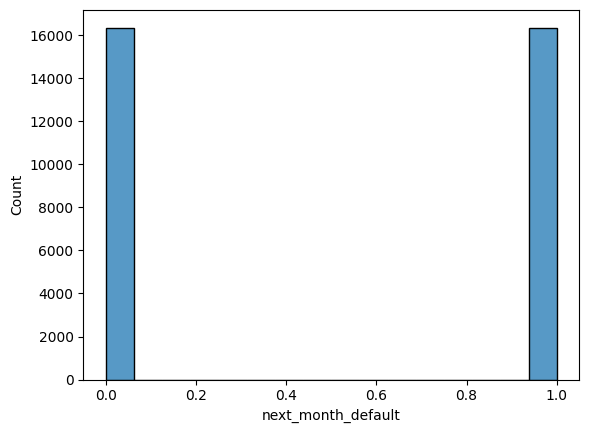

In [ ]:
sns.histplot(y_resampled)

# Model Training

# XG Boost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, scale_pos_weight=1)
xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_val)

F2 Score: 0.4187568157033806
Recall: 0.3991683991683992
Precision: 0.5210312075983717
AUC-ROC: 0.7508879495180865


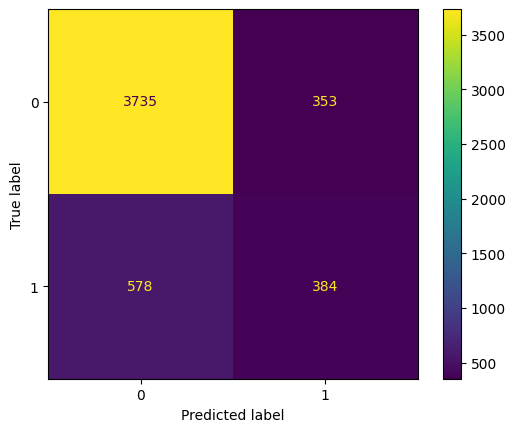

In [ ]:
print("F2 Score:", fbeta_score(y_val, y_pred_xgb, beta=2))
print("Recall:", recall_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_val, xgb.predict_proba(X_val)[:, 1]))
cm = confusion_matrix(y_val, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(sklearn.metrics.classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4088
           1       0.52      0.40      0.45       962

    accuracy                           0.82      5050
   macro avg       0.69      0.66      0.67      5050
weighted avg       0.80      0.82      0.81      5050



# decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_resampled, y_resampled)
y_pred_dt = dt.predict(X_val)

F2 Score: 0.4186625790381299
Recall: 0.45426195426195426
Precision: 0.3187454412837345
AUC-ROC: 0.6128941865243235


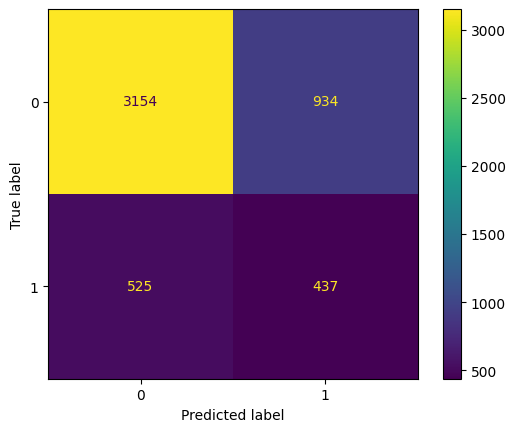

In [ ]:
print("F2 Score:", fbeta_score(y_val, y_pred_dt, beta=2))
print("Recall:", recall_score(y_val, y_pred_dt))
print("Precision:", precision_score(y_val, y_pred_dt))
print("AUC-ROC:", roc_auc_score(y_val, dt.predict_proba(X_val)[:, 1]))
cm = confusion_matrix(y_val, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print("Classificaton report:\n",sklearn.metrics.classification_report(y_val, y_pred_dt))

Classificaton report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      4088
           1       0.32      0.45      0.37       962

    accuracy                           0.71      5050
   macro avg       0.59      0.61      0.59      5050
weighted avg       0.75      0.71      0.73      5050



# Random Forest

In [ ]:
rf = sklearn.ensemble.RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_val)

F2 Score: 0.4628839590443686
Recall: 0.45114345114345117
Precision: 0.5166666666666667
AUC-ROC: 0.7652979309657393
Classificaton report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4088
           1       0.52      0.45      0.48       962

    accuracy                           0.82      5050
   macro avg       0.70      0.68      0.68      5050
weighted avg       0.81      0.82      0.81      5050



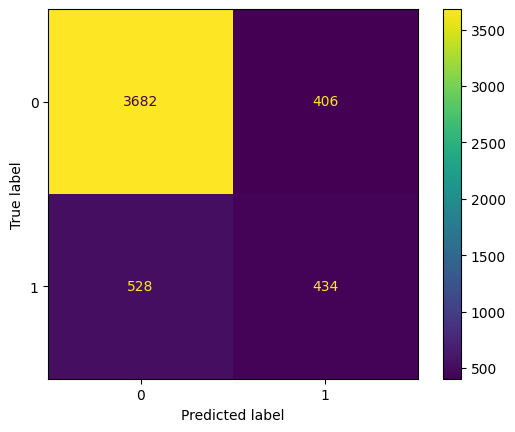

In [ ]:
print("F2 Score:", fbeta_score(y_val, y_pred_rf, beta=2))
print("Recall:", recall_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1]))
print("Classificaton report:\n",sklearn.metrics.classification_report(y_val, y_pred_rf))
cm = confusion_matrix(y_val, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# LightGBM

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state = 42, max_depth= 10,learning_rate =0.05,num_leaves =63)
lgbm.fit(X_resampled, y_resampled)
y_pred_lgbm = lgbm.predict(X_val)

F2 Score: 0.4741563434429731
Recall: 0.46153846153846156
Precision: 0.5323741007194245
AUC-ROC: 0.7674930123560261
Classificaton report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4088
           1       0.53      0.46      0.49       962

    accuracy                           0.82      5050
   macro avg       0.70      0.68      0.69      5050
weighted avg       0.81      0.82      0.82      5050



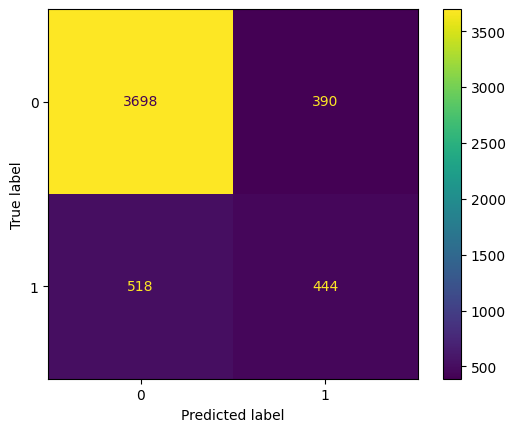

In [ ]:
print("F2 Score:", fbeta_score(y_val, y_pred_lgbm, beta=2))
print("Recall:", recall_score(y_val, y_pred_lgbm))
print("Precision:", precision_score(y_val, y_pred_lgbm))
print("AUC-ROC:", roc_auc_score(y_val, lgbm.predict_proba(X_val)[:, 1]))
print("Classificaton report:\n",sklearn.metrics.classification_report(y_val, y_pred_lgbm))
cm = confusion_matrix(y_val, y_pred_lgbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Logistic regression

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_val_scaled = scaler.transform(X_val)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_resampled)
y_pred_lr = lr.predict(X_val_scaled)

In [ ]:
y_proba = lr.predict_proba(X_val_scaled)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_val, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_val, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_lr):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_proba):.4f}")
print("F2 Score:", fbeta_score(y_val, y_pred_lr, beta=2))

Confusion Matrix:
[[3310  778]
 [ 383  579]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      4088
           1       0.43      0.60      0.50       962

    accuracy                           0.77      5050
   macro avg       0.66      0.71      0.68      5050
weighted avg       0.81      0.77      0.78      5050

Accuracy: 0.7701
Precision: 0.4267
Recall: 0.6019
F1 Score: 0.4994
ROC AUC Score: 0.7602
F2 Score: 0.5561959654178674


# 🧾 Model Comparison Report: Classification Performance (F2-Focused)

## 📊 Performance Summary

| Metric              | XGBoost     | Decision Tree | Random Forest | LightGBM     | Logistic Regression |
|---------------------|-------------|----------------|----------------|--------------|----------------------|
| **F2 Score**        | 0.4188      | 0.4187         | 0.4629         | 0.4742       | **0.5562**           |
| **Recall (Class 1)**| 0.3992      | 0.4543         | 0.4511         | 0.4615       | **0.6019**           |
| **Precision (Class 1)**| **0.5210**  | 0.3187         | 0.5167         | **0.5324**   | 0.4267               |
| **AUC-ROC**         | 0.7509      | 0.6129         | 0.7653         | **0.7675**   | 0.7602               |
| **Accuracy**        | 0.82        | 0.71           | 0.82           | 0.82         | 0.7701               |

---

## 📌 Key Insights

### ✅ Best Model by F2 Score (Recall-weighted)
- **Logistic Regression (F2 = 0.556)**:
  - Best performance on **F2 Score**, emphasizing **recall**.
  - Ideal for imbalanced classification tasks.
  - Highest recall (0.60), but lower precision (0.43).

### ⚖️ Balanced Model
- **LightGBM**:
  - Very balanced performance across all metrics.
  - Strong **Precision** (0.532) and **ROC-AUC** (0.767).
  - Good choice for general use when you want strong F2, precision, and recall.

### ❌ Weakest Model
- **Decision Tree**:
  - Lowest AUC and Precision.
  - Underperforms across most metrics.
  - Should be avoided unless interpretability is the top priority.

---

## 🔍 Class-Wise Behavior from Confusion Matrices

| Model               | True Neg (TN) | False Pos (FP) | False Neg (FN) | True Pos (TP) |
|---------------------|---------------|----------------|----------------|----------------|
| **XGBoost**         | 3735          | 353            | 578            | 384            |
| **Decision Tree**   | 3154          | 934            | 525            | 437            |
| **Random Forest**   | 3682          | 406            | 528            | 434            |
| **LightGBM**        | 3698          | 390            | 518            | 444            |
| **Logistic Reg.**   | 3310          | 778            | **383**        | **579**        |

- **Logistic Regression** has the **lowest false negatives (383)** — excellent for **recall-focused** applications.
- **LightGBM** achieves a good balance between precision and recall.

---

## 🧠 Recommendations

- ✅ If your **goal is recall** (e.g., fraud detection, disease prediction), use **Logistic Regression**.
- ✅ For **balanced performance**, choose **LightGBM**.
- ❌ Avoid **Decision Trees** due to poor performance across all metrics.

---

## 📈 Final Verdict

| Rank | Model               | Reason                                                             |
|------|---------------------|--------------------------------------------------------------------|
| 🥇   | Logistic Regression | Best F2 Score and Recall; strong ROC-AUC; good for imbalanced data |
| 🥈   | LightGBM            | Balanced performance across metrics; high precision and AUC        |
| 🥉   | Random Forest       | Decent overall but slightly worse recall                           |
| 4️⃣   | XGBoost             | High precision but lower recall reduces F2                         |
| 5️⃣   | Decision Tree       | Weakest overall; poor AUC and precision                            |

---



# balance random forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

X_t,X_v,y_t,y_v = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_t,y_t)
y_pred_brf = brf.predict(X_v)

F2 Score: 0.5368926214757048
Recall: 0.5582120582120582
Precision: 0.4657415437987858
AUC-ROC: 0.7811954567091554
Classificaton report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      4088
           1       0.47      0.56      0.51       962

    accuracy                           0.79      5050
   macro avg       0.68      0.70      0.69      5050
weighted avg       0.81      0.79      0.80      5050



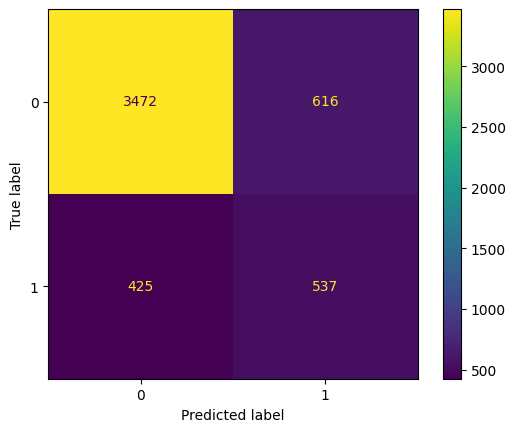

In [ ]:
print("F2 Score:", fbeta_score(y_v, y_pred_brf, beta=2))
print("Recall:", recall_score(y_v, y_pred_brf))
print("Precision:", precision_score(y_v, y_pred_brf))
print("AUC-ROC:", roc_auc_score(y_v, brf.predict_proba(X_v)[:, 1]))
print("Classificaton report:\n",sklearn.metrics.classification_report(y_v, y_pred_brf))
cm = confusion_matrix(y_v, y_pred_brf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

F2 Score: 0.3313041442285179
Recall: 0.29417879417879417
Precision: 0.6690307328605201
AUC-ROC: 0.7700171334589143
Classificaton report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      4088
           1       0.67      0.29      0.41       962

    accuracy                           0.84      5050
   macro avg       0.76      0.63      0.66      5050
weighted avg       0.82      0.84      0.81      5050



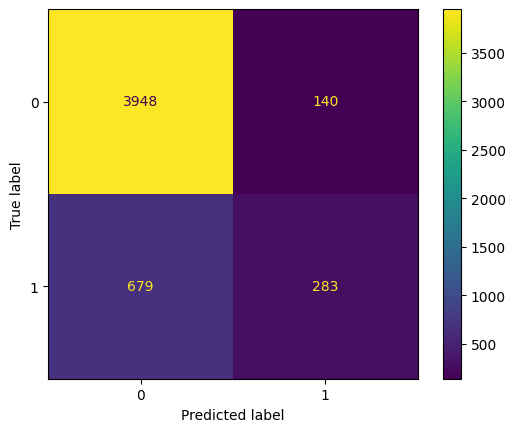

In [ ]:
rf2 = sklearn.ensemble.RandomForestClassifier(random_state=42,class_weight={0:1,1:4})
rf2.fit(X_t,y_t)
y_pred_rf2 = rf2.predict(X_v)

print("F2 Score:", fbeta_score(y_v, y_pred_rf2, beta=2))
print("Recall:", recall_score(y_v, y_pred_rf2))
print("Precision:", precision_score(y_v, y_pred_rf2))
print("AUC-ROC:", roc_auc_score(y_v, rf2.predict_proba(X_v)[:, 1]))
print("Classificaton report:\n",sklearn.metrics.classification_report(y_v, y_pred_rf2))
cm = confusion_matrix(y_v, y_pred_rf2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# 🔄 Ensemble Methods Without SMOTE: Performance & Reasoning

## 📌 Objective
We tested ensemble models on **imbalanced data without SMOTE** to assess their performance in identifying credit card defaulters. Since detecting defaulters (positive class) is more important than identifying non-defaulters, **Recall and F2 Score** are prioritized.

---

## 🌲 Balanced Random Forest

**Balanced Random Forest** is designed to handle class imbalance by undersampling the majority class during each bootstrap iteration.

### 🔢 Metrics:

- **F2 Score**: `0.5369`
- **Recall**: `0.5582`
- **Precision**: `0.4657`
- **AUC-ROC**: `0.7812`

### 🧾 Classification Report:

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.89      | 0.85   | 0.87     | 4088    |
| 1     | 0.47      | 0.56   | 0.51     | 962     |

- **Confusion Matrix**:
$$ [[3472,\ 616],$$

$$ \\ [ 425,\ 537]] $$



### ✅ Reasoning:
- The model shows **strong recall for defaulters (class 1)** at 0.56, meaning it **correctly captures over half of the actual defaulters**.
- Although precision is lower (0.46), this trade-off is acceptable in financial risk contexts.
- **Balanced Random Forest is effective without SMOTE** because it handles imbalance internally via resampling.

---

## 🌳 Regular Random Forest (Without SMOTE)

This model is trained **without any resampling or class weighting**, on the original imbalanced data.

### 🔢 Metrics:

- **F2 Score**: `0.3313`
- **Recall**: `0.2942`
- **Precision**: `0.6690`
- **AUC-ROC**: `0.7700`

### 🧾 Classification Report:

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.85      | 0.97   | 0.91     | 4088    |
| 1     | 0.67      | 0.29   | 0.41     | 962     |

- **Confusion Matrix**:
$$ [[3948, 140],$$

$$ [ 679, 283]]$$


### ❌ Reasoning:
- The model is **heavily biased toward the majority class (non-defaulters)**.
- While it achieves high precision (0.67), the **recall is very low (0.29)**, meaning **most defaulters are missed**.
- This makes it **unreliable for identifying risky customers**, despite the good overall accuracy and AUC-ROC.

---

## 📊 Conclusion

| Model                 | F2 Score | Recall (Class 1) | Precision (Class 1) | AUC-ROC |
|----------------------|----------|------------------|----------------------|---------|
| Balanced RandomForest| 0.537    | 0.558            | 0.466                | 0.781   |
| Regular RandomForest | 0.331    | 0.294            | 0.669                | 0.770   |

- ✅ **Balanced Random Forest** outperforms standard Random Forest in scenarios where **identifying defaulters is crucial**.
- ❗ In default prediction tasks, **recall and F2 Score** are more meaningful than accuracy or AUC, as they ensure fewer **false negatives**.
- 🧠 **Conclusion**: Balanced approaches or SMOTE-based methods are **essential when working with imbalanced financial datasets**.

---


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Define the F2 score as the evaluation metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Initialize the LightGBM classifier with balanced class weights
model = lgb.LGBMClassifier(class_weight='balanced', random_state=42, verbose = -1)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 62],
    'max_depth': [-1, 5, 10]
}

# Set up GridSearchCV with 3-fold cross-validation and F2 scoring
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=3,
    verbose=0,
    n_jobs=-1  # use -1 to use all CPU cores
)

# Fit the model on the training data
grid_search.fit(X_resampled, y_resampled)

# Output the best hyperparameters and corresponding F2 score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F2 Score (CV):", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 62}
Best F2 Score (CV): 0.7896442965038503


In [ ]:
from lightgbm import LGBMClassifier

# Use the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Initialize a new model with those best parameters
final_model = LGBMClassifier(**best_params, class_weight='balanced', random_state=42)

# Train (fit) the final model on the full training data
final_model.fit(X_resampled, y_resampled)
y_pred_final_model = final_model.predict(X_val)

F2 Score: 0.48005120546191593
Recall: 0.4677754677754678
Precision: 0.5363528009535161
AUC-ROC: 0.7671479529356242
Classificaton report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4088
           1       0.54      0.47      0.50       962

    accuracy                           0.82      5050
   macro avg       0.71      0.69      0.70      5050
weighted avg       0.81      0.82      0.82      5050



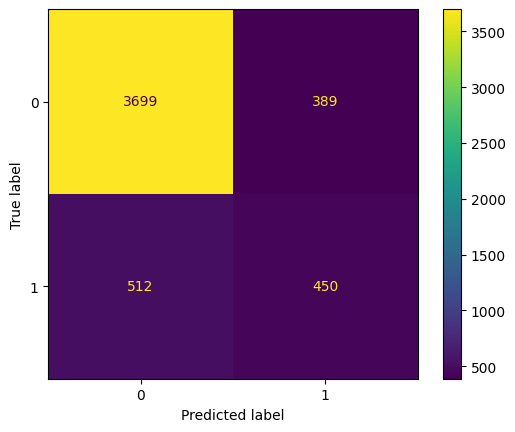

In [ ]:
print("F2 Score:", fbeta_score(y_val, y_pred_final_model, beta=2))
print("Recall:", recall_score(y_val, y_pred_final_model))
print("Precision:", precision_score(y_val, y_pred_final_model))
print("AUC-ROC:", roc_auc_score(y_val, final_model.predict_proba(X_val)[:, 1]))
print("Classificaton report:\n",sklearn.metrics.classification_report(y_val, y_pred_final_model))
cm = confusion_matrix(y_val, y_pred_final_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# 📊 LightGBM Hyperparameter Tuning with SMOTE: Evaluation & Insights

## ⚙️ Grid Search Setup

We used `GridSearchCV` to find optimal hyperparameters for the **LightGBM classifier** using **SMOTE-resampled data** to address class imbalance.

### ✅ Parameters and Evaluation:
- **Search space** included:
  - `n_estimators`: [100, 200]
  - `learning_rate`: [0.01, 0.05, 0.1]
  - `num_leaves`: [15, 31, 62]
  - `max_depth`: [-1, 5, 10]
- **Evaluation Metric**: F2 Score (focuses on recall)
- **Class Weight**: `balanced`
- **Cross-validation**: 3-fold

---

## 🏆 Best Parameters Found

```python
{
  'learning_rate': 0.05,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 62
}
```

## 🏆 Best F2 Score (on SMOTE-resampled CV)
**F2 Score** (CV on SMOTE-resampled data): `0.7896`

---

## 🧪 Final Evaluation on Original Validation Set

After retraining the model using the best hyperparameters on the full **SMOTE-resampled training set**, we evaluated its performance on the **original (non-SMOTE) validation set**.

### 📉 Performance Metrics

- **F2 Score**: `0.4801`  
- **Recall**: `0.4678`  
- **Precision**: `0.5364`  
- **AUC-ROC**: `0.7671`

---

### 📋 Classification Report

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.88      | 0.90   | 0.89     | 4088    |
| 1     | 0.54      | 0.47   | 0.50     | 962     |

---

### 🔢 Confusion Matrix

$$ [[3699, 389],$$

$$[ 512, 450]]$$


---

## 🤔 Interpretation & Reasoning

Although the cross-validated F2 score on SMOTE-resampled data was high (~0.79), the actual performance on the original imbalanced validation set dropped significantly (**F2 ≈ 0.48**).  
This discrepancy can be explained as follows:

- **SMOTE** synthetically balances the dataset, improving performance during training and cross-validation.
- However, in the **real-world imbalanced distribution**, the model finds it harder to detect the minority class (defaulters), resulting in lower recall and F2 score.

---

## 🔁 Comparison with Logistic Regression

| Model              | F2 Score | Recall  | Precision | AUC-ROC |
|-------------------|----------|---------|-----------|---------|
| Logistic Regression | 0.5562   | 0.6019  | 0.4267    | 0.7602  |
| Tuned LightGBM      | 0.4801   | 0.4678  | 0.5364    | 0.7671  |

Despite being a simpler model, **Logistic Regression** outperforms the **tuned LightGBM** in **recall and F2 score**—the most important metrics in this credit default detection task.

---

## 📌 Conclusion

- **Recall is critical** in credit default problems because missing a defaulter (false negative) is far more costly than a false positive.
- **F2 Score**, which places more emphasis on recall, is the right choice for evaluation in this context.
- While **SMOTE + hyperparameter tuning** helped during model training, the LightGBM model still **underperforms Logistic Regression** on actual (imbalanced) data.
- This highlights the **importance of evaluating models on the true distribution**, not just on balanced or synthetic datasets.


# tuning threshold

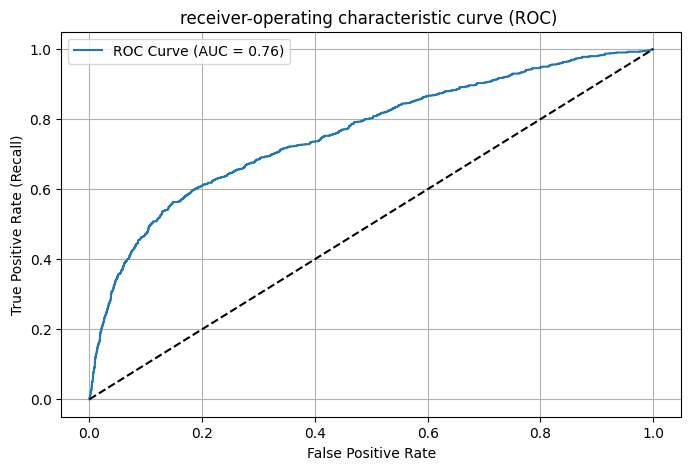

In [ ]:
# Predict probabilities on the VALIDATION set (not on SMOTE data)
y_probs = lr.predict_proba(X_val_scaled)[:, 1]  # Probability of class '1' (default)

fpr, tpr, thresholds_roc = roc_curve(y_val, y_probs)
roc_auc = roc_auc_score(y_val, y_probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("receiver-operating characteristic curve (ROC) ")
plt.legend()
plt.grid()
plt.show()

In [ ]:
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_probs)
f2_scores = 5 * (precision * recall) / (4 * precision + recall + 1e-8)
best_threshold_index = np.argmax(f2_scores)
best_threshold = thresholds_pr[best_threshold_index]
best_f2 = f2_scores[best_threshold_index]

print(f"🔧 Best threshold (F2 score): {best_threshold:.3f}")
print(f"✅ Best F2 score: {best_f2:.3f}")

🔧 Best threshold (F2 score): 0.356
✅ Best F2 score: 0.586


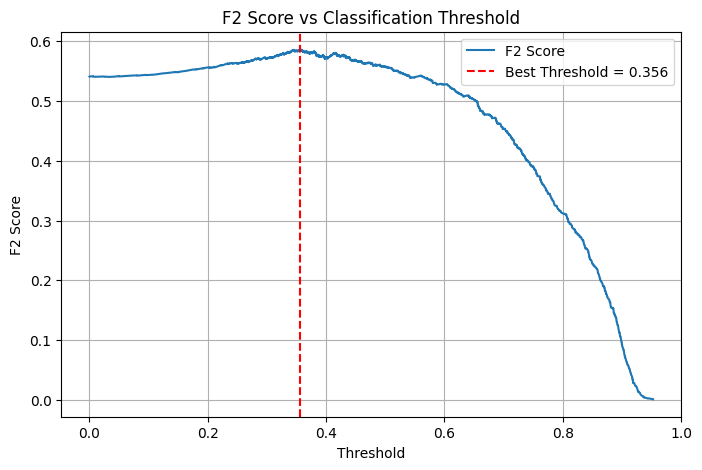

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds_pr, f2_scores[:-1], label='F2 Score')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.3f}')
plt.xlabel("Threshold")
plt.ylabel("F2 Score")
plt.title("F2 Score vs Classification Threshold")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Apply best threshold to get predictions
y_pred_thresh = (y_probs >= best_threshold).astype(int)

# Evaluation
print("📊 Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_thresh))

print(f"Precision: {precision_score(y_val, y_pred_thresh):.3f}")
print(f"Recall: {recall_score(y_val, y_pred_thresh):.3f}")
print(f"F1 Score: {f1_score(y_val, y_pred_thresh):.3f}")
print(f"F2 Score: {fbeta_score(y_val, y_pred_thresh, beta=2):.3f}")
print("Classificaton report:\n",sklearn.metrics.classification_report(y_val, y_pred_thresh))

📊 Confusion Matrix:
[[1816 2272]
 [ 149  813]]
Precision: 0.264
Recall: 0.845
F1 Score: 0.402
F2 Score: 0.586
Classificaton report:
               precision    recall  f1-score   support

           0       0.92      0.44      0.60      4088
           1       0.26      0.85      0.40       962

    accuracy                           0.52      5050
   macro avg       0.59      0.64      0.50      5050
weighted avg       0.80      0.52      0.56      5050



You observed that without threshold tuning, your model had:

Lower false negatives (i.e., it caught more defaulters)

But also a lower F2-score

F2-score prioritizes recall but still considers precision.

Lower false negatives = Your model is doing a good job catching defaulters.

Lower F2-score = You're probably also getting a high number of false positives, which is pulling down precision, and thus F2.

F2-score emphasizes recall more than precision, but it still punishes bad precision.

# 🎯 Threshold Tuning to Maximize F2 Score

## 🔍 Objective

In credit default prediction, **recall** is more critical than precision — we want to catch as many defaulters (positive class) as possible, even if it means a few false alarms.  
To do this, we tuned the decision threshold of our classifier to **maximize the F2 score**, which gives more weight to recall.

---

## ✅ Best Threshold Found

- **Threshold**: 0.356  
- **F2 Score**: `0.586`

---

## 📉 Performance at Threshold = 0.356

- **Precision**: `0.264`
- **Recall**: `0.845`
- **F1 Score**: `0.402`
- **F2 Score**: `0.586`

---

### 📋 Classification Report

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.92      | 0.44   | 0.60     | 4088    |
| 1     | 0.26      | 0.85   | 0.40     | 962     |

- **Accuracy**: 0.52  
- **Macro Avg F1**: 0.50  
- **Weighted Avg F1**: 0.56  

---

### 🔢 Confusion Matrix

$$ [[1816, 2272],$$

$$[ 149, 813]]$$


---

## 🧠 Interpretation & Reasoning

- **High Recall (0.845)**: The model catches a large portion of actual defaulters (positive class).
- **Low Precision (0.264)**: Many of the predicted defaulters are actually non-defaulters.
- **High False Positives**: 2,272 non-defaulters were misclassified.
- **Low False Negatives**: Only 149 defaulters were missed — this is a good outcome in this domain.

### 📌 Why F2 Score Improved?

- **F2 score** gives **more importance to recall** than precision.
- By lowering the threshold to 0.35, the model becomes more "aggressive" in predicting the positive class (default).
- This results in **more true positives** (higher recall), which helps improve the F2 score.
- However, the **precision drops**, because many negative class instances are incorrectly labeled as defaulters.
- Since F2 still considers precision (though less than recall), the low precision limits how high the F2 can go — but overall, this trade-off is acceptable for catching defaulters.

---

## ⚖️ Summary

| Metric           | Value    |
|------------------|----------|
| Best Threshold   | 0.35     |
| F2 Score         | 0.5847   |
| Recall (Defaulters Caught) | 0.845     |
| Precision        | 0.264    |
| False Negatives  | 149      |
| False Positives  | 2272     |

---

## 🧾 Final Insight

In credit default detection, **minimizing false negatives** is more important than keeping false positives low.  
Thus, **threshold tuning is an effective strategy** for maximizing F2 and catching more defaulters — even at the cost of lower precision.



In [ ]:
best_f2 = 0
best_threshold = 0

thresholds = np.linspace(0, 1, 100)
f2_scores = []
y_val_probs = lr.predict_proba(X_val_scaled)[:, 1]

for t in thresholds:
    y_val_pred = (y_val_probs >= t).astype(int)
    f2 = fbeta_score(y_val, y_val_pred, beta=2)
    f2_scores.append(f2)

    if f2 > best_f2:
        best_f2 = f2
        best_threshold = t

print(f"Best threshold for F2: {best_threshold:.2f} with F2 score: {best_f2:.4f}")

Best threshold for F2: 0.35 with F2 score: 0.5847


# 📌 Why Recall and F2 Score Matter in Credit Card Default Prediction

## 🎯 Problem Context

The objective of this classification task is to **predict credit card defaulters**—customers who are likely to miss payments in the future. Identifying these individuals is crucial for minimizing financial risk to the bank or credit institution.

## ⚠️ Why High Recall is Critical

- **False Negatives (FN)** — i.e., **failing to identify a defaulter** — are far more costly than false positives.
- Letting a potential defaulter pass as a "safe" customer may result in **loan disbursal to a high-risk individual**, leading to **financial loss**.
- Hence, our model must focus on **catching as many actual defaulters as possible**, even at the cost of occasionally flagging non-defaulters.

✅ **This is exactly what Recall measures**:
> $$Recall = TP / (TP + FN) $$
> It quantifies the percentage of actual defaulters that were correctly identified by the model.

## 🧮 Why Use F2 Score Instead of F1

- The **F1 Score** balances **precision** and **recall** equally.
- However, in credit default prediction, **recall is more important than precision**.
  - It’s acceptable to have a few false alarms (non-defaulters flagged as defaulters) as long as we **don’t miss actual defaulters**.
- The **F2 Score** gives more weight to **recall** than to precision:

> $$
F_\beta = (1 + \beta^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{(\beta^2 \cdot \text{Precision}) + \text{Recall}}
$$

> where **β = 2**, so **Recall gets 4× more importance than Precision**.

✅ Therefore, **F2 Score is a better evaluation metric** for this problem.

---

## 🧠 Conclusion

To **reduce financial risk**, our model must be **recall-oriented**, ensuring that **true defaulters are rarely missed**. That’s why:

- We **optimize for F2 Score**
- We **prioritize models with higher recall**
- Models like **Logistic Regression** and **LightGBM**, which offer **higher recall and F2**, are preferred.
- Still inorder to get better accuracy one should use **LightGBM** but accuracy is not a requirement here.
---


# Model Interpretability

In [ ]:
coeffs = lr.coef_[0]
odds_ratios = np.exp(coeffs)

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coeffs,
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=False)

print(coef_df)

               Feature  Coefficient  Odds Ratio
26      delayed_months     0.857166    2.356473
12           Bill_amt2     0.406969    1.502258
5                pay_0     0.308171    1.360934
16           Bill_amt6     0.118581    1.125898
13           Bill_amt3     0.105039    1.110754
25   utilization_ratio     0.095462    1.100167
27           max_delay     0.079813    1.083084
4                  age     0.070522    1.073068
28  consec_delinquency     0.030989    1.031474
24   PAY_TO_BILL_ratio     0.016873    1.017016
1                  sex     0.007741    1.007771
6                pay_2    -0.011333    0.988731
23        AVG_Bill_amt    -0.024552    0.975747
19            pay_amt3    -0.039639    0.961137
21            pay_amt5    -0.040418    0.960388
22            pay_amt6    -0.057776    0.943862
20            pay_amt4    -0.062478    0.939433
14           Bill_amt4    -0.062626    0.939295
15           Bill_amt5    -0.089728    0.914180
8                pay_4    -0.098765    0

# 🧠 Logistic Regression Feature Importance Analysis

## 🔍 Objective
We interpret the coefficients of a **Logistic Regression** model trained to predict **credit card default**.  
This analysis helps understand **how each feature influences** the likelihood of a customer defaulting on payment.

---

## 📊 Top Features by Coefficient & Odds Ratio

| Feature               | Coefficient | Odds Ratio |
|-----------------------|-------------|------------|
| `delayed_months`      | **0.857**   | **2.356**  |
| `Bill_amt2`           | 0.407       | 1.502      |
| `pay_0`               | 0.308       | 1.361      |
| `Bill_amt6`           | 0.119       | 1.126      |
| `Bill_amt3`           | 0.105       | 1.111      |
| `utilization_ratio`   | 0.095       | 1.100      |
| `max_delay`           | 0.080       | 1.083      |
| `age`                 | 0.071       | 1.073      |
| `consec_delinquency`  | 0.031       | 1.031      |
| `PAY_TO_BILL_ratio`   | 0.017       | 1.017      |
| `sex`                 | 0.008       | 1.008      |
| `pay_2`               | -0.011      | 0.989      |
| `AVG_Bill_amt`        | -0.025      | 0.976      |
| `pay_amt3`            | -0.040      | 0.961      |
| `pay_amt5`            | -0.040      | 0.960      |
| `pay_amt6`            | -0.058      | 0.944      |
| `pay_amt4`            | -0.062      | 0.939      |
| `Bill_amt4`           | -0.063      | 0.939      |
| `Bill_amt5`           | -0.090      | 0.914      |
| `pay_4`               | -0.099      | 0.906      |
| `pay_6`               | -0.099      | 0.905      |
| `marriage`            | -0.108      | 0.898      |
| `education`           | -0.120      | 0.887      |
| `pay_3`               | -0.127      | 0.881      |
| `pay_5`               | -0.130      | 0.878      |
| `LIMIT_BAL`           | -0.198      | 0.820      |
| `pay_amt1`            | -0.273      | 0.761      |
| `pay_amt2`            | -0.282      | 0.755      |
| `Bill_amt1`           | -0.338      | 0.713      |

---

## 🧾 Interpretability: Key Insights

### ✅ **Positive Coefficients / Odds Ratio > 1**
These features **increase the likelihood of default**:
- **`delayed_months` (OR = 2.36)**: Customers with more delayed months are significantly more likely to default.
- **`pay_0` (OR = 1.36)**: Delay in the most recent payment is a strong signal of risk.
- **High bill amounts** (`Bill_amt2`, `Bill_amt6`, etc.): Suggest ongoing debt load.

### ❌ **Negative Coefficients / Odds Ratio < 1**
These features **decrease the odds of default**:
- **`LIMIT_BAL` (OR = 0.82)**: Higher credit limit is associated with lower risk — likely due to financial stability.
- **`pay_amt1`, `pay_amt2`**: Higher past repayments reduce default risk.
- **`education`, `marriage`**: Demographic features may correlate with financial behavior.

---

## 🎯 Why Interpretability Matters

- Logistic Regression is **inherently interpretable**, allowing us to **trust and audit** predictions — crucial in **finance and risk modeling**.
- Each coefficient indicates **log-odds impact** on the default probability.
- **Odds Ratio > 1** → Higher risk of default  
  **Odds Ratio < 1** → Lower risk of default

This helps:
- **Risk teams** understand customer profiles.
- **Regulators** trust the system's decisions.
- **Business** strategize on credit limit adjustments or targeted outreach.

---

## 📌 Model Selection Context

Since our evaluation metric is **F2 Score**, we prioritize **recall** (catching as many defaulters as possible):

> F2 gives **more weight to recall** than precision, ideal in scenarios like:
> - Credit risk assessment
> - Fraud detection
> - Medical diagnosis

False negatives (missed defaulters) are **costly** — so we prefer models that **maximize recall** while maintaining interpretability.

---

## ✅ Final Thought

While more complex models (like Random Forest or LGBM) may offer slightly higher raw performance, **Logistic Regression** remains a **strong baseline** due to:

- Solid recall performance (especially with threshold tuning)
- Transparent feature importance
- Actionable insights for financial decision-making



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

thresholds = np.linspace(0, 1, 100)
f1s, f2s, precisions, recalls = [], [], [], []

for t in thresholds:
    preds = (y_val_probs >= t).astype(int)
    f1s.append(f1_score(y_val, preds))
    f2s.append(fbeta_score(y_val, preds, beta=2, zero_division=0))
    precisions.append(precision_score(y_val, preds))
    recalls.append(recall_score(y_val, preds))

best_idx = np.argmax(f2s)
best_threshold = thresholds[best_idx]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

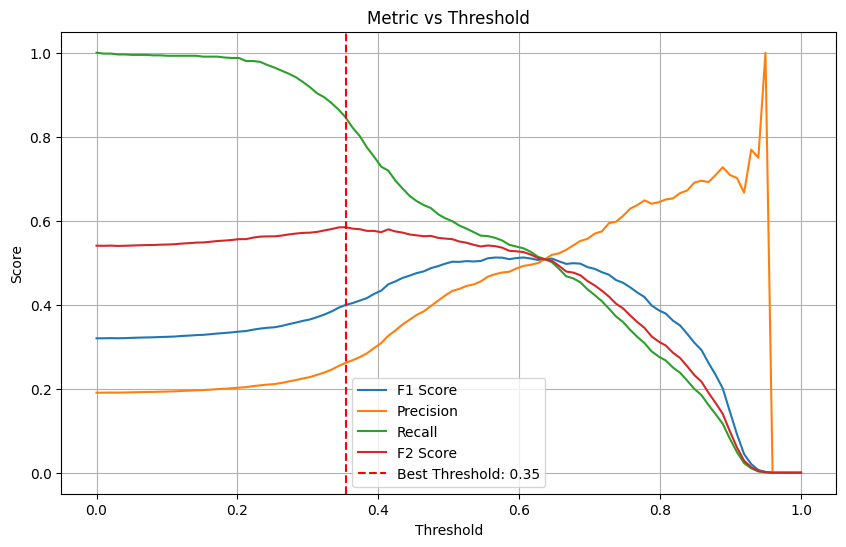

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1s, label='F1 Score')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f2s, label='F2 Score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Metric vs Threshold")
plt.legend()
plt.grid()
plt.show()


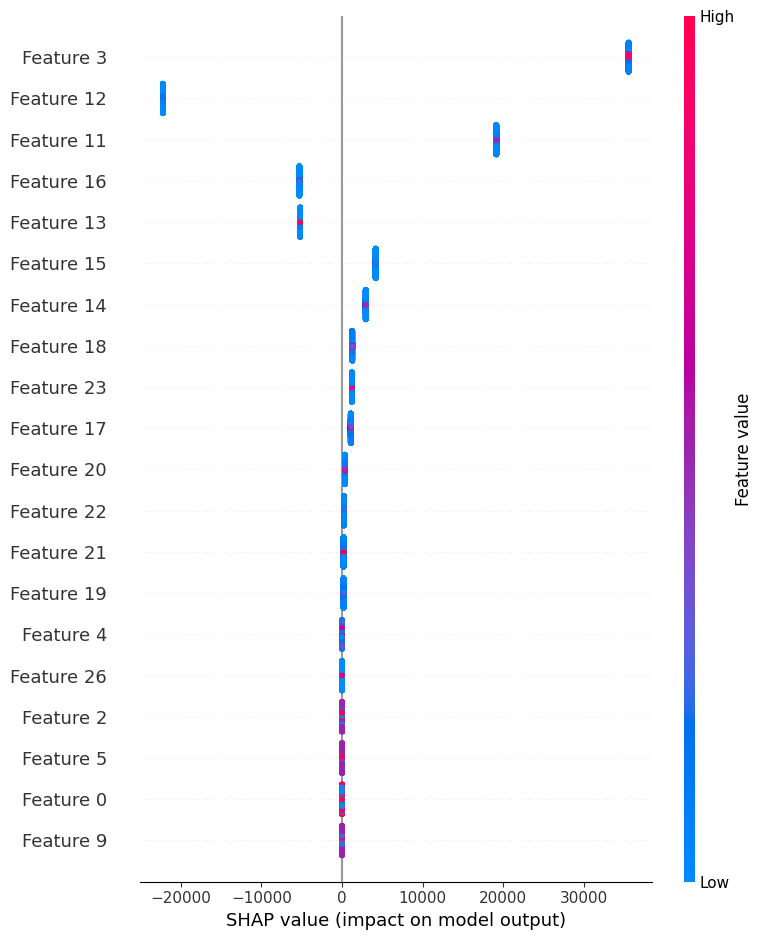

In [ ]:
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_val_scaled)
shap.summary_plot(shap_values, X_val_scaled)

# Final Predictions

In [ ]:
val_data = pd.read_csv('/content/validate_dataset_final.csv')
val_data

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,5012,1,0,2,240000,51,0,0,0,0,...,106832.47,109060.11,3591.87,3718.80,3797.93,3820.66,3949.01,3976.22,103737.83,0.04
5012,5013,1,1,3,60000,33,0,0,0,0,...,29062.53,28862.41,2100.23,3000.32,1499.86,1499.82,1099.82,1100.18,41858.83,0.04
5013,5014,1,0,1,290000,36,1,-2,-1,-1,...,16725.60,17427.88,0.00,568.10,16165.93,1000.03,1000.05,1000.15,8481.17,0.39
5014,5015,1,1,2,120000,28,0,0,0,0,...,75710.06,77502.18,3283.48,2999.75,5000.26,3000.13,2999.95,4000.04,84492.00,0.04


preparing data for prediction

In [ ]:
val_data['utilization_ratio'] = val_data['AVG_Bill_amt'] / val_data['LIMIT_BAL']
val_data['delayed_months'] = val_data[pay_cols].apply(lambda x: sum(x > 0), axis=1)
val_data['max_delay'] = val_data[pay_cols].max(axis=1)
val_data['consec_delinquency'] = val_data[pay_cols].apply(lambda x: int((x > 0).sum() >= 3), axis=1)

In [ ]:
val_data

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,utilization_ratio,delayed_months,max_delay,consec_delinquency
0,1,1,1,2,220000,32,0,0,0,0,...,1419.80,1999.97,3000.21,30788.71,23456.33,0.31,0.106620,0,0,0
1,2,2,0,1,350000,35,-1,-1,-1,0,...,4026.80,234.10,1565.11,26346.39,13660.33,1.00,0.039030,0,0,0
2,3,2,1,1,310000,39,0,0,0,0,...,14000.32,10000.12,10000.16,10000.21,258034.17,0.04,0.832368,0,0,0
3,4,1,0,2,20000,47,0,0,0,2,...,0.14,1499.93,0.02,1000.26,13333.33,0.08,0.666667,3,2,1
4,5,2,1,2,500000,30,0,0,0,0,...,7521.96,9065.17,8841.07,12000.21,77204.50,0.23,0.154409,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,5012,1,0,2,240000,51,0,0,0,0,...,3797.93,3820.66,3949.01,3976.22,103737.83,0.04,0.432241,0,0,0
5012,5013,1,1,3,60000,33,0,0,0,0,...,1499.86,1499.82,1099.82,1100.18,41858.83,0.04,0.697647,0,0,0
5013,5014,1,0,1,290000,36,1,-2,-1,-1,...,16165.93,1000.03,1000.05,1000.15,8481.17,0.39,0.029245,1,1,0
5014,5015,1,1,2,120000,28,0,0,0,0,...,5000.26,3000.13,2999.95,4000.04,84492.00,0.04,0.704100,0,0,0


In [ ]:
val_data_new = val_data.drop('Customer_ID',axis = 1)

In [ ]:
val_data.isna().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [ ]:
val_data_scaled = scaler.transform(val_data_new)

predicting as per best threshold

In [ ]:
y_test_probs = lr.predict_proba(val_data_scaled)[:, 1]
y_test_preds = (y_test_probs >= best_threshold).astype(int)

creating DataFrame and exporting

In [ ]:
res = pd.DataFrame({
    "Customer": val_data["Customer_ID"],
    "next_month_default": y_test_preds
})

In [ ]:
res.to_csv("submission_23323049.csv", index=False)